# Telecom Users Dataset 
Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

## What task has to be completed?
The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

- Description of the data (with the calculation of basic statistics);
- Research of dependencies and formulation of hypotheses;
- Building models for predicting the outflow (with justification for the choice of a particular model) based on tested   hypotheses and identified relationships;
- Comparison of the quality of the obtained models.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
from wordcloud import WordCloud
from IPython.core.display import display, HTML, Javascript

# scaling
from sklearn.preprocessing import StandardScaler

# SMOTE
# from imblearn.over_sampling import SMOTE

# keras
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# model Evaluation
from sklearn import metrics
 


# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

# MISC
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning
In this step we check for NaN values, useless attributes in the data, hot encoding, etc

In [2]:
df=pd.read_csv('telecom_users.csv')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,1777.25,3546.5,5291.75,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.00,0.0,0.00,1.00
tenure,5986.0,32.468760,24.516391,0.00,9.00,29.0,56.00,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.90,118.75


In [6]:
df = df.reset_index()
df = df.drop(['index','customerID'],axis=1)

df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
df.Contract.value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

# EDA 

In [8]:
# stats
df[df['Churn']=='Yes'][['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,1587.000000,1587.000000
mean,18.246377,74.164871
std,19.667262,24.965002
min,1.000000,18.850000
25%,2.000000,55.675000
50%,10.000000,79.500000
75%,30.000000,94.400000
max,72.000000,118.350000


In [9]:
# stats 
df[df['Churn']=='No'][['tenure','MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4399.0,37.599682,24.065131,0.00,15.000,37.00,61.0,72.00
MonthlyCharges,4399.0,61.424506,31.086101,18.25,25.125,64.75,88.7,118.75


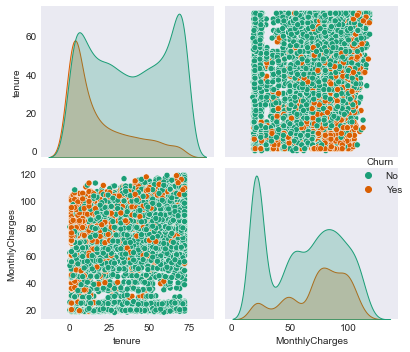

In [10]:
# pairplot
plt.style.use('seaborn-dark')
sns.pairplot(df[['tenure','MonthlyCharges','Churn']],hue='Churn',palette='Dark2');
plt.tight_layout();

In [11]:
# Churn
churn_plot = df['Churn'].value_counts().reset_index()
churn_plot.columns = ['Churn?',"Number_of_customers"]

# plot
px.pie(churn_plot,values ="Number_of_customers",names='Churn?',title='Churn',template='none')

### There is a class imbalance in dataset, instance of churn is only 26.5% and normal is 73.5%
- Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
- SMOTE 

In [12]:
# churn Fiber optic users
print('Total Fiber optic users',df[df['InternetService'] =='Fiber optic']['InternetService'].count())
print('\n')
print('No. of Fiber optic users Not Churn',df[(df['Churn'] =='No')& (df['InternetService'] =='Fiber optic')]['InternetService'].count())
print('\n')
print('No. of Fiber optic users Churned',df[(df['Churn'] =='Yes')& (df['InternetService'] =='Fiber optic')]['InternetService'].count())

Total Fiber optic users 2627


No. of Fiber optic users Not Churn 1536


No. of Fiber optic users Churned 1091


In [13]:
print('Median monthly charges of staying customers',df[(df['Churn'] =='No')& (df['InternetService'] =='Fiber optic')]['MonthlyCharges'].median())
print('Median monthly charges of churned customers',df[(df['Churn'] =='Yes')& (df['InternetService'] =='Fiber optic')]['MonthlyCharges'].median())

Median monthly charges of staying customers 94.75
Median monthly charges of churned customers 87.4


In [14]:
# categorical columns

cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

In [15]:

num_columns = ['TotalCharges','MonthlyCharges','tenure']

In [16]:
for feature in df[cat_columns].columns:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('1. Unique vlaues:',df[feature].unique())
    print(' ')
    print('2. Min values:',df[feature].min())
    print(' ')
    print('3. value counts:',df[feature].value_counts(1)*100)
    print(' ')
    print('**************************************************')
    print('***************-end-******************************')
    print('\n ')

#"""


 
************* Column name: gender *************
1. Unique vlaues: ['Male' 'Female']
 
2. Min values: Female
 
3. value counts: Male      50.952222
Female    49.047778
Name: gender, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: SeniorCitizen *************
1. Unique vlaues: [0 1]
 
2. Min values: 0
 
3. value counts: 0    83.862345
1    16.137655
Name: SeniorCitizen, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: Partner *************
1. Unique vlaues: ['Yes' 'No']
 
2. Min values: No
 
3. value counts: No     51.486803
Yes    48.513197
Name: Partner, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: Dependents *************
1. Unique vlaues: ['Yes' 'No']
 
2. Min values: No
 


In [17]:

for feature in df[num_columns].columns:
    print('*******','Column name:',feature,'*******')
    
    print('Min values:',df[feature].min())
    print('Max values:',df[feature].max())
    
    print('***********-end-***********')
    print('\n')

******* Column name: TotalCharges *******
Min values:  
Max values: 999.9
***********-end-***********


******* Column name: MonthlyCharges *******
Min values: 18.25
Max values: 118.75
***********-end-***********


******* Column name: tenure *******
Min values: 0
Max values: 72
***********-end-***********




In [18]:
df['TotalCharges'].min()

' '

In [19]:
# empty space rows in Totalcharges 

df[df['TotalCharges'] == df['TotalCharges'].min()][0:3]

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No


In [20]:
# replace empty space with median

df['TotalCharges'] =  df['TotalCharges'].replace(' ',2298.06)# replace empty string with median of total charges

In [21]:
# change data type to float

df['TotalCharges'] =  df['TotalCharges'].astype(float)

In [22]:
df[df['tenure']==0][0:3]

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,2298.06,No
634,1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2298.06,No
2771,3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2298.06,No


In [23]:
# replacing zero with median
df['tenure'] =  df['tenure'].replace(0,29)

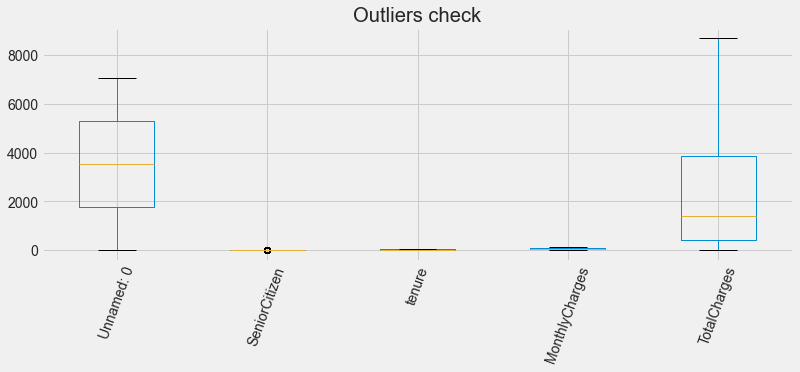

In [24]:
# plot outliers
plt.style.use('fivethirtyeight')
df.plot(kind='box',figsize=(12,4))
plt.xticks(rotation=70);
plt.title('Outliers check');

In [25]:
telecom_users_churn_yes = df[df["Churn"] == "Yes"]
telecom_users_churn_no = df[df["Churn"] == "No"]

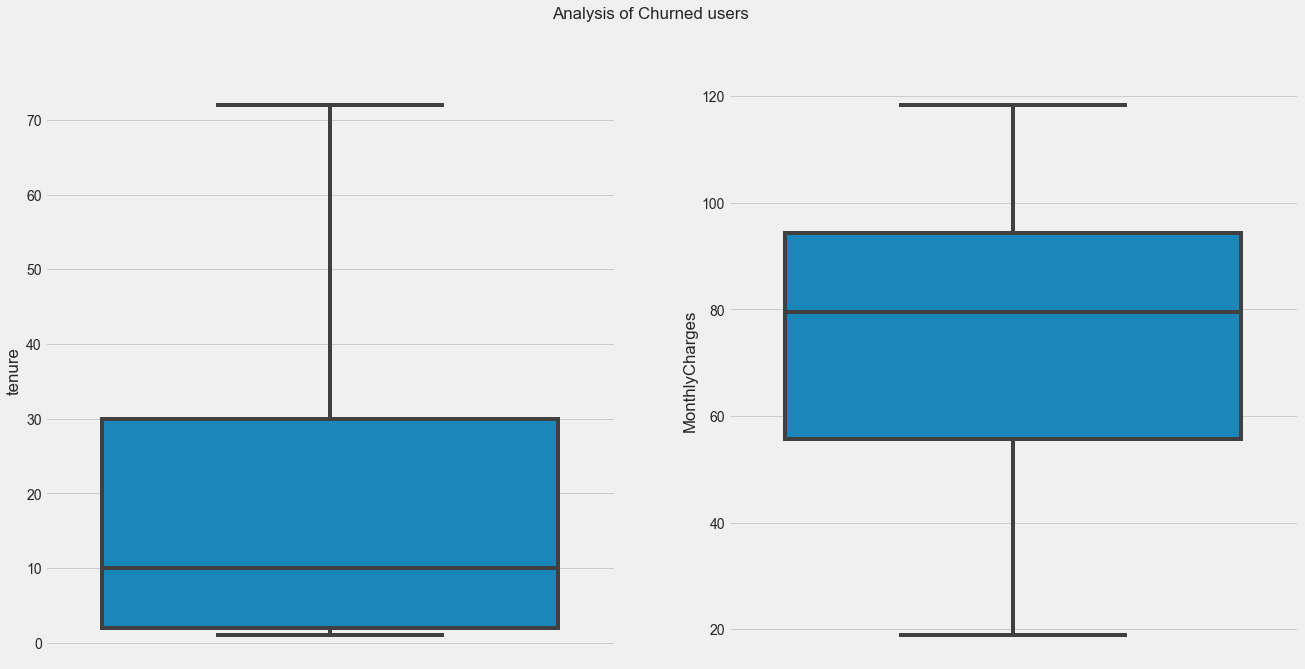

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle('Analysis of Churned users')

sns.boxplot(ax = axes[0], data=telecom_users_churn_yes,hue="Churn",y="tenure")
sns.boxplot(ax = axes[1],data=telecom_users_churn_yes,hue="Churn",y="MonthlyCharges")

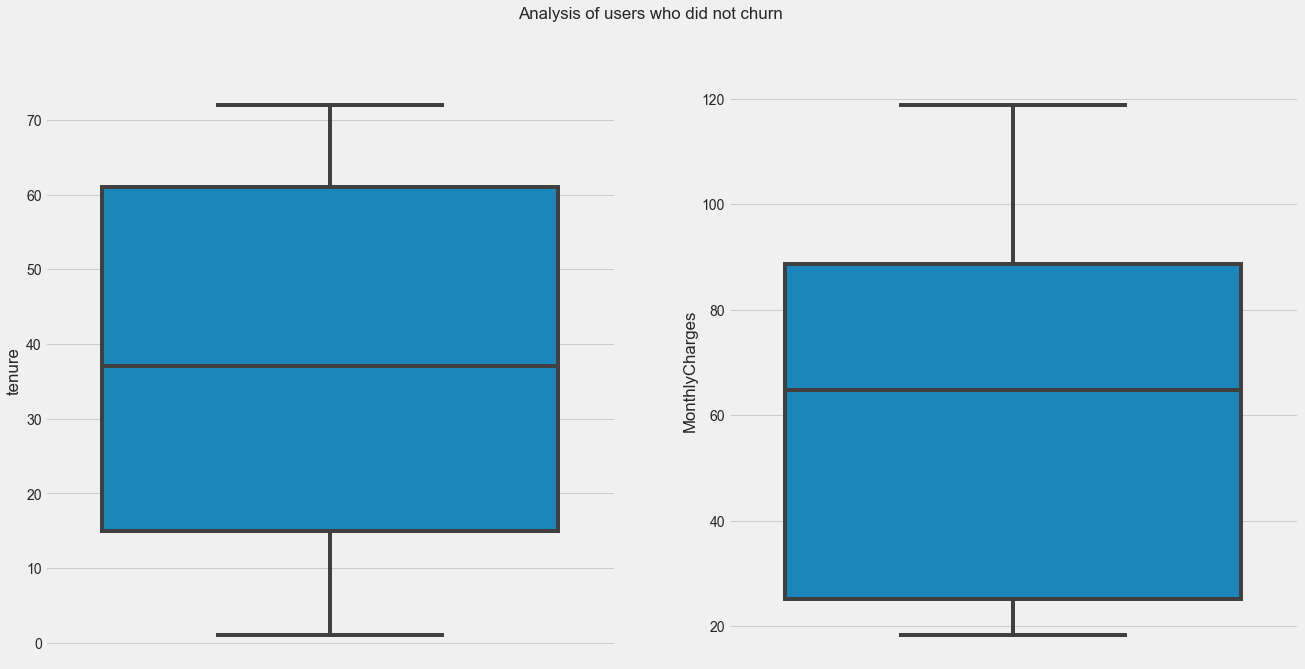

In [27]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle('Analysis of users who did not churn')

sns.boxplot(ax = axes[0], data=telecom_users_churn_no,hue="Churn",y="tenure")
sns.boxplot(ax = axes[1],data=telecom_users_churn_no,hue="Churn",y="MonthlyCharges")

## Observation 
- The average tenure of users who have churned is 18 months. The median is 10 months.
- A user who churns incurs a montly charge of 74 to 79 currency units
- The mean and median of users who do not churn is 27 months
- On an average a user who does not churn pays 64 currency units per month

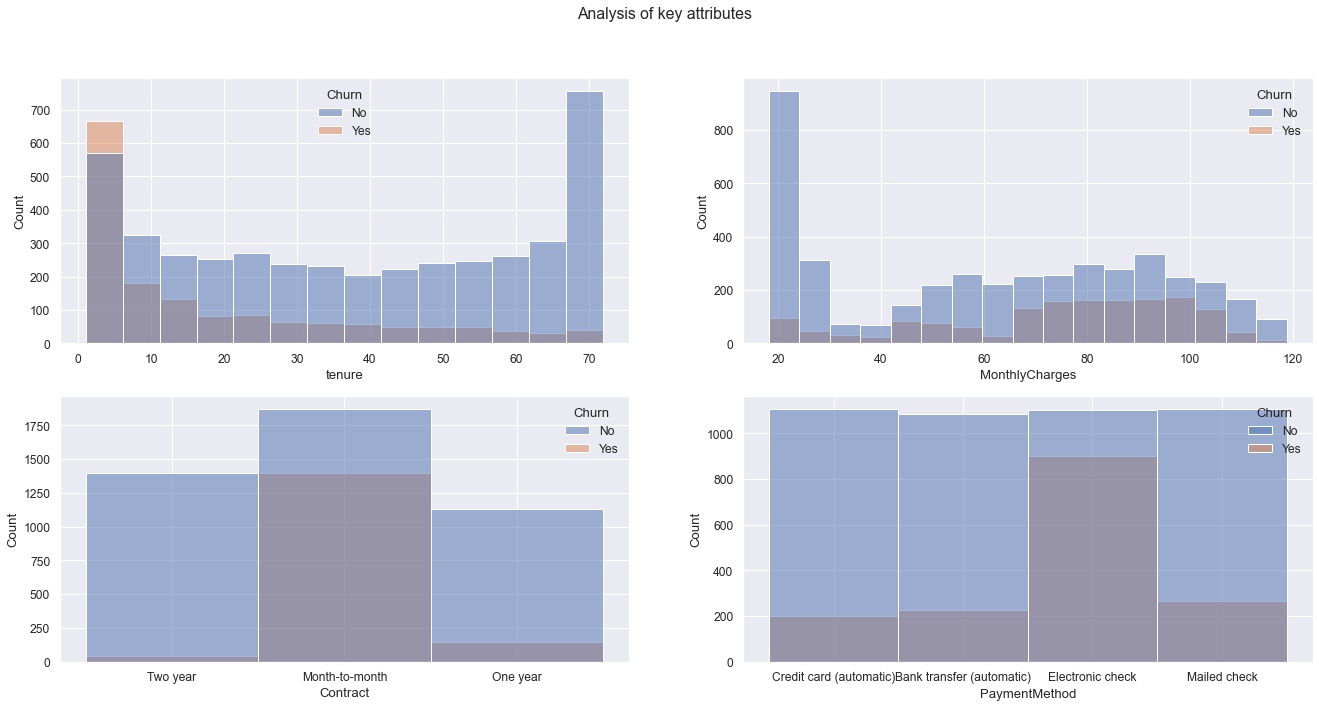

In [29]:
telecom_users = df
fig, axes = plt.subplots(2,2, figsize=(20, 10))
fig.suptitle('Analysis of key attributes')

sns.set_context("paper")

sns.color_palette("bright")
sns.set(font_scale=1.1)

sns.histplot( ax = axes[0,0], data=telecom_users,x = 'tenure',hue='Churn')
sns.histplot( ax = axes[0,1], data=telecom_users,x = 'MonthlyCharges',hue='Churn')
sns.histplot( ax = axes[1,0], data=telecom_users,x = 'Contract',hue='Churn')
sns.histplot( ax = axes[1,1], data=telecom_users,x = 'PaymentMethod',hue='Churn')

## Observation 
* A large percentage of users with month-to-month contract churn.
* An unusually high percentage of users whose payment method is "Electronic check" churn as compared to other means.
* We have already established that users with Monthly Charges between 80 and 100 currency units are churning more.
* Users will tenure less than 5 are also churning more as compared to other tenure values.

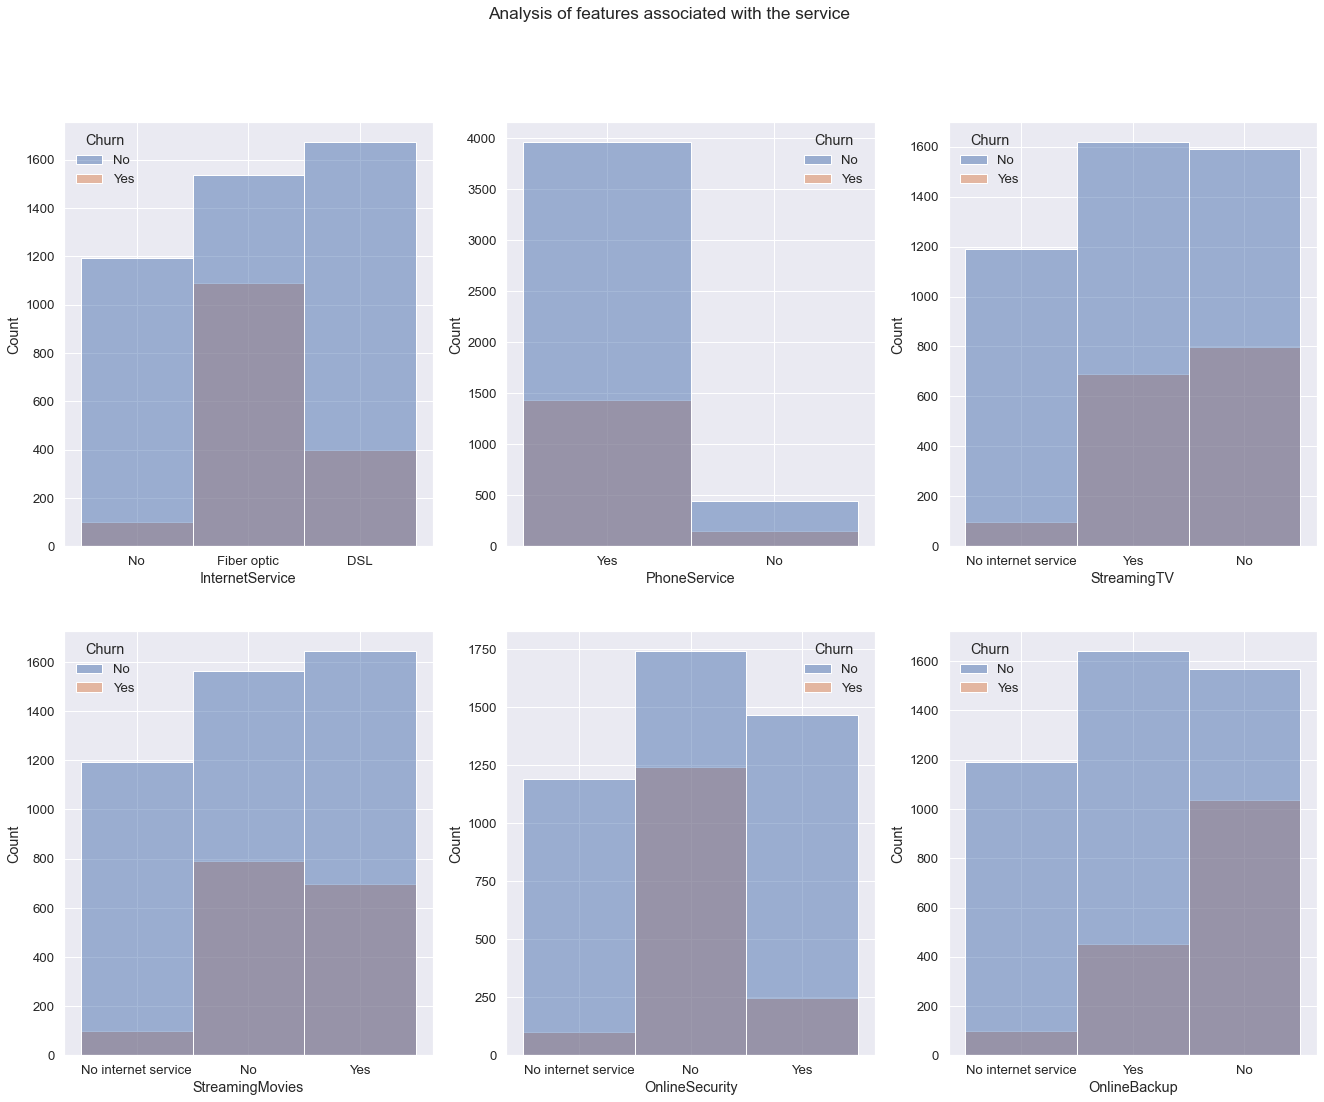

In [30]:
sns.set_context("paper")

sns.color_palette("bright")
sns.set(font_scale=1.2)

fig, axes = plt.subplots(2,3, figsize=(20, 16))
fig.suptitle('Analysis of features associated with the service')

sns.histplot( ax = axes[0,0], data=telecom_users, x = 'InternetService', hue='Churn')
sns.histplot( ax = axes[0,1], data=telecom_users, x = 'PhoneService', hue='Churn')
sns.histplot( ax = axes[0,2], data=telecom_users, x = 'StreamingTV', hue='Churn')

sns.histplot( ax = axes[1,0], data=telecom_users, x = 'StreamingMovies', hue='Churn')
sns.histplot( ax = axes[1,1], data=telecom_users, x = 'OnlineSecurity', hue='Churn')
sns.histplot( ax = axes[1,2], data=telecom_users, x = 'OnlineBackup', hue='Churn')

plt.show()

## Observation
* Fibre Optic Internet services subscribers are a large percentage of churning customers
* Users who have not subscribed to OnlineSecurity and OnlineBackup are churning more
* A large number of users have subscribed to phone services. There is no significant pattern observerd with respect to churn.
* Similarly users with with Streaming services subscription (TV and movies) don't exhibit any significant pattern towards to churn.

In [31]:
# convert categorical to numerical
for features in df[cat_columns].columns:
    df[features] = pd.Categorical(df[features]).codes 

In [32]:
X= df.drop('Churn',axis=1)
y= df.pop('Churn')


In [33]:
x.head()

NameError: name 'x' is not defined

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state =1)

In [35]:
## Scaling data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy on Train set 0.8059100067159167
Accuracy on Test set 0.6666666666666666
F1-score on Test set: 0.5


              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.56      0.45      0.50        11

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.66      0.67      0.66        30





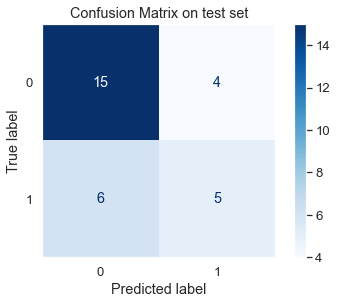

In [36]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier(max_features= 5,max_depth= 10,min_samples_split= 90,min_samples_leaf= 30,random_state=1)

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))
print('\n')

# confusion matrix
metrics.plot_confusion_matrix(DT_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');